# Final Project Submission
- Student : Kennedy Kariuki

# BUSINESS UNDERSTANDING
Syria Tel, a telecommunication company, wants to predict customer churn. Identifying customers who are likely to stop using their services soon. Churn represents a major financial challenge, as acquiring new customers is often more expensive than retaining existing ones. By analyzing customer data, Syria Tel can devolop targeted strategies to improve customer retention and reduce revenue loss

## Project Overview
In this project we aim to build a classifier to predict whether a customer will ('soon') stop doing business with Syria Tel, a Telecommunications company. 
### Objective
- Are churned customers more likely to have high or low usage
- The corelation between churn and other variables

# 

# DATA UNDERSTANDING
- The dataset has 21 variables with a record of 3,333 records

## Import the libraries
- **Data manipulation** : pandas, numpy
- **Visualization** : matplotlib, seaborn
- **Machine learning** : sklearn for Decision Tree, evaluation, and preprocessing
- **Handling Imbalanced Data** : imblearn.SMOTE for oversampling minority classes

In [153]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE 

import warnings
warnings.filterwarnings("ignore")

## Load the dataset
- The dataset is loaded using pd.read_csv().
- It is inspected using .head(), .tail(), .dtypes(), .columns(), .info(), .describe() to understand the data structure.

In [109]:
# Load the csv dataset
data = pd.read_csv('churn_dataset.csv')
# Check the top 5
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [110]:
# Check the bottom 5
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [111]:
# Check the shape
print(f"The dataset has {data.shape[1]} variables with a record of {data.shape[1]}")

The dataset has 21 variables with a record of 21


In [112]:
# Check the datatype
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [113]:
# Check the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [114]:
# Check column names
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [115]:
# Check the statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [116]:
# Check the categorical summary
data.describe(include='O').T

,count,unique,top,freq
state,3333,51,WV,106
phone number,3333,3333,370-3021,1
international plan,3333,2,no,3010
voice mail plan,3333,2,no,2411


In [117]:
#checking for unique values in each column

for column in data:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}','\n': {unique_values}", '\n')

Unique values in column 'state','
': ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND'] 

Unique values in column 'account length','
': [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 15

# DATA PREPARATION

## Data Cleaning

In [118]:
# Create a DataFrame copy to be used in data cleaning
data1 = data.copy(deep=True)
data1.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [119]:
# Check for missing values
data1.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

- Ensures model performance is not affected by null values.

In [120]:
# Fix the column names by replacing spaces with underscore and converting to lower case
data1.columns = data1.columns.str.replace(" ", "_").str.lower()
# Check the updated columns
data1.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [121]:
# Check for duplicates
data1.duplicated().sum()

0

In [122]:
# Drop irrelevant columns
data1 = data1.drop(columns=["phone_number", "state"])

#### Feature Engineering

In [123]:
# Encode categorical variables
data1["international_plan"] = data1["international_plan"].map({"yes":1, "no": 0})
data1["voice_mail_plan"] = data1["voice_mail_plan"].map({"yes":1, "no":0})
data1["churn"] = data1["churn"].astype(int) # Convert churn to integer

### Statistical testing

In [124]:
# Example: Chi-Square Test for 'international_plan' vs. 'churn'
combine_table = pd.crosstab(data1['international_plan'], data1['churn'])
chi2, p, dof, expected = stats.chi2_contingency(combine_table)

print(f"Chi-Square Test Statistic: {chi2:.2f}")
print(f"P-value: {p:.2f}")

if p < 0.05:
    print("Significant: 'international_plan' affects churn.")
else:
    print("No significant: 'international_plan' does not affect churn.")

Chi-Square Test Statistic: 222.57
P-value: 0.00
Significant: 'international_plan' affects churn.


#### Observation
- A high test statistic indicates a strong deviation from the null hypothesis, suggesting a significant association between international_plan and churn.
-  p = 0, meaning we reject the null hypothesis that international_plan and churn are independent.

## EDA

### Univariate
- Analyze the distribution of the churn variable

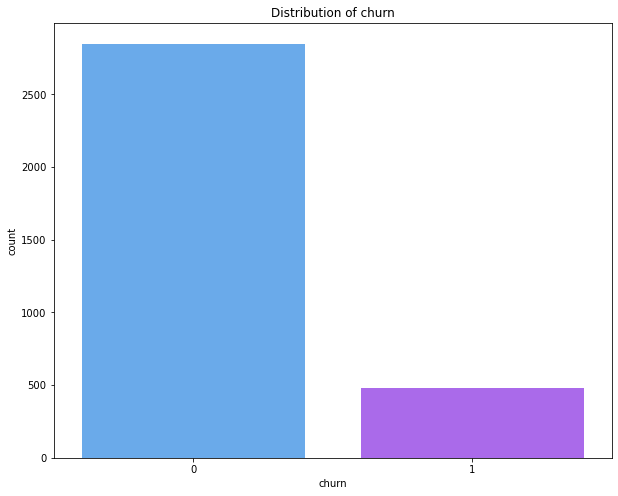

In [125]:
# plot churn distribution
plt.figure(figsize=(10,8))
sns.countplot(x="churn", data=data1, palette="cool")
plt.title("Distribution of churn")
plt.xlabel("churn")
plt.ylabel("count");

#### Observation
- **Business Imlication**, Since churn is relatively low, retaining customers could be a key business strategy.

In [126]:
# Display churn percentage
churn_count = data1["churn"].value_counts(normalize='True') * 100
print(churn_count.round(1))

0    85.5
1    14.5
Name: churn, dtype: float64


- 85.5% of customers did not churn, while 14.5% churned
- The above barchart shows that the dataset is imbalanced, meaning the model may predict "No_Churn" more often by default

### Bivariate
- Check impact of customer_service_calls on churn

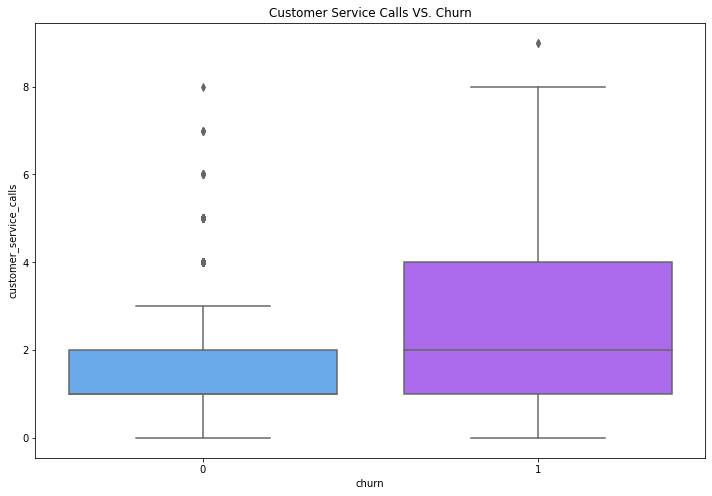

In [127]:
# plot customer_sercice_calls vs churn
plt.figure(figsize=(12, 8))
sns.boxplot(x='churn', y='customer_service_calls', data=data1, palette='cool')
plt.title("Customer Service Calls VS. Churn");

#### Observation
- A high number of customer_service_calls might indicate unresolved issues or dissatisfaction.
- The median number of customer_service_calls is higher for churn = 1, suggests that customers who call the customer service frequently are more likely to churn.

### Multivariate
- Anliyze import of international plan on the distribution of churn 

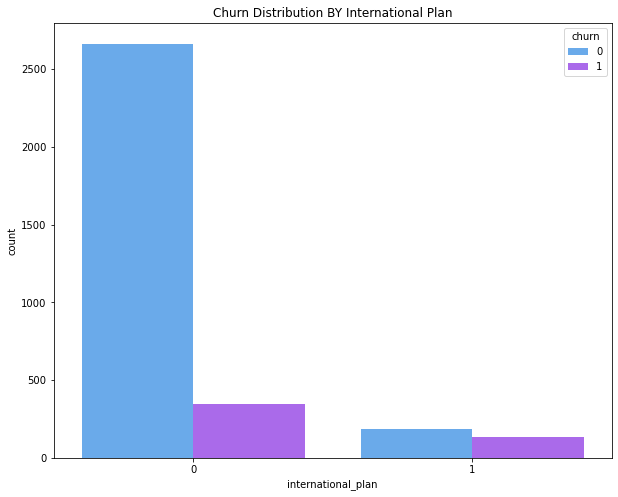

In [128]:
# Plot churn VS. International plan
plt.figure(figsize=(10, 8))
sns.countplot(x='international_plan', hue='churn', data=data1, palette='cool')
plt.title("Churn Distribution BY International Plan");

#### Observation
- The chart shows that customers with an international plan (international_plan = 1) have a relatively higher proportion of churned users compared to those without an international plan (international_plan = 0).
- Even though fewer customers have an international plan overall, their churn count is almost as high as those without an international plan.

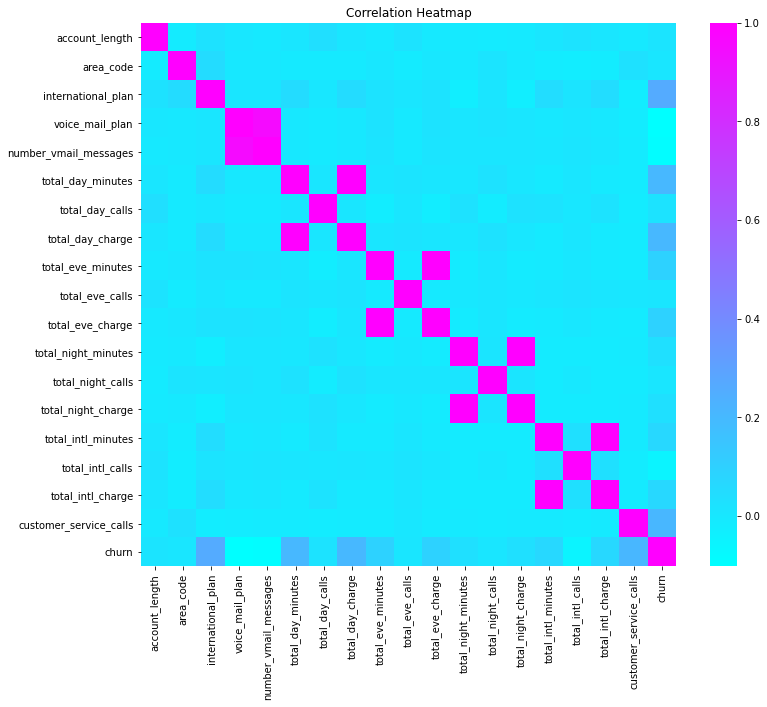

In [129]:
# Compute correlation matrix 
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data1.corr(), cmap="cool")
plt.title("Correlation Heatmap")
plt.show()


#### Observation
Strongly Correlated Features (Multicollinearity)
- Features like total_day_minutes, total_day_charge, total_eve_minutes, and total_eve_charge show high correlation (values close to 1).

Correlation with Churn
- customer_service_calls appears to have a noticeable positive correlation with churn, reinforcing our earlier observation that frequent customer service calls are linked to customer dissatisfaction.
- international_plan also shows some correlation with churn, which aligns with our previous analysis.

# MODEL

## 1 LogisticRegression

### Splitting
- **Split the dataset** into training (`X_train, y_train`) and testing (`X_test, y_test`) sets.
- 80% training ** Used to train the model.
- 20% testing ** Used to evaluate model performance.

In [130]:
# Split features and target variable
x = data1.drop(columns=["churn"])
y = data1["churn"]

In [131]:
# Split data into training and testing sets(80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=42)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_test shape: (667, 18)
y_test shape: (667,)


- The test set contains 667 rows (samples) and 18 features (independent variables).

### Fixing the imbalance class
- Balances the dataset -- Helps models learn equally from churned & non-churned customers.
- Improves model performance -- Especially recall (True Positives) for churn.

In [132]:
print("Before SMOTE: \n", y_train.value_counts())  # Original 

Before SMOTE: 
 0    2280
1     386
Name: churn, dtype: int64


In [133]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

- Ensures the model does not ignore the minority class (churners).
- Prevents biased predictions towards the majority class.

In [134]:
# Check new class distribution
print("After SMOTE: \n", pd.Series(y_train_resampled).value_counts())  # Balanced 

After SMOTE: 
 1    2280
0    2280
Name: churn, dtype: int64


### feature scaling using `StandardScaler`:
  - Standardization is important to ensure all numerical features are on a similar scale.
  - It improves numerical stability and model performance.

In [135]:
# Standardize numerical feature
s_scaler = StandardScaler()
x_train_scaled = s_scaler.fit_transform(x_train_resampled)
x_test_scaled = s_scaler.transform(x_test)

### Train the baseline Logistic Regression
- Train a Logistic Regression model using all available features.
- Make predictions on the test set.
- **Evaluate performance** using:
        - **Accuracy** (general performance)
        - **Recall** for churn prediction
- This serves as a **baseline model**.

In [136]:
# Create the model
lr = LogisticRegression()

# Train the model 
lr.fit(x_train_scaled, y_train_resampled)

LogisticRegression()

In [137]:
# Prediction
y_pred = lr.predict(x_test)
y_pred_bal = lr.predict(x_test_scaled)

- y_pred is the prediction on the original class
- y_pred_bal is the prediction on the balanced class

### Evaluating the baseline model

In [138]:
# Report on model with imbalanced data
print("classification_report - LogisticRegression Imbalanced")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

classification_report - LogisticRegression Imbalanced
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       570
           1       0.15      1.00      0.25        97

    accuracy                           0.15       667
   macro avg       0.07      0.50      0.13       667
weighted avg       0.02      0.15      0.04       667

[[  0 570]
 [  0  97]]


c:\Users\hp\anaconda4\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Observation(imbalanced data)
- The dataset is highly imbalanced, with 570 non-churned (class 0) and 97 churned (class 1) customers.
- The model is performing poorly due to the imbalance, significantly favoring the minority class (churned customers).
- Recall: **class 0** 0.00 : The model is completely missing non-churned customers.
- Recall: **class 1** 1.00 : The model classifies all customers as churned to maximize recall, leading to 100% recall but poor precision.

In [139]:
# Report on balanced churn
print("classification_report - LogisticRegression Balanced")
print(classification_report(y_test, y_pred_bal))
print(confusion_matrix(y_test, y_pred_bal))

classification_report - LogisticRegression Balanced
              precision    recall  f1-score   support

           0       0.93      0.71      0.81       570
           1       0.29      0.70      0.41        97

    accuracy                           0.71       667
   macro avg       0.61      0.71      0.61       667
weighted avg       0.84      0.71      0.75       667

[[405 165]
 [ 29  68]]


#### Observation(balanced data)
- After applying class weighting (class_weight='balanced'), the model now provides better performance across both classes, compared to the previous imbalanced version.
- Recall: **class 0** 0.71 : The model correctly identifies 71% of non-churned customers.
- Recall: **class 1** 0.70 : The model identifies 70% of actual churned customers, much better than before.


In [151]:
# Check the training accuracy score
lr.score(x_train_scaled, y_train_resampled).round(2)

0.75

In [141]:
# Check the test accuracy score
lr.score(x_test_scaled, y_test).round(2)

0.71

#### Obsersavation
- The training and test accuracies are very close, meaning the model is not overfitting or underfitting(75% vs. 71%)
- Recall for class 1 is low at 71% 
- lets improve on our recall
- The difference of 0.04 accuracy suggest the model perfome similarly on unseen data

## 2 Decision Tree Classifier

In [142]:
# Training decision tree classifier model
dt = DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train_resampled)

DecisionTreeClassifier()

### Check feature importance
- Which features contribute the most to your model's predictions

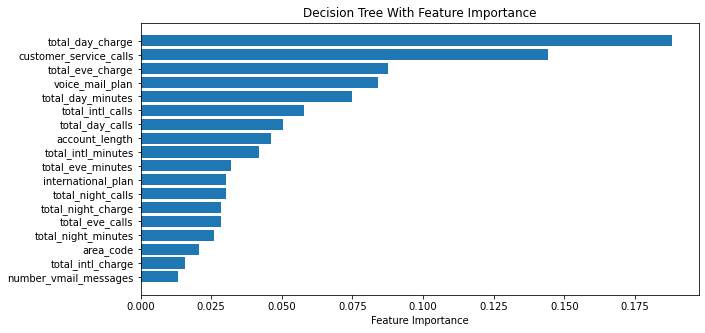

In [143]:
# train a decision tree as `dt`
feature_importance = dt.feature_importances_
feature_names = x.columns  # Ensure X is your feature matrix

# Sort features by importance
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree With Feature Importance")
plt.show()

**Observation**:
- The above graph align the variable in descending order of their importance on the model decision
- Top features have the most impact on the predictions
- The graph identified total day charge as the most predictor of customer churns, with a score of 0.2.Then followed by the customer_service_calls and total_eve_charge as the next influential features.
- The relatively low importance of features like total_eve_call and total_night_charge indicates these features plays a small role in prediction

### Evaluate the dt model

In [144]:
# Check accuracy on the training data
dt.score(x_train_scaled, y_train_resampled)

1.0

In [145]:
# Check accuracy on the test data
dt.score(x_test_scaled, y_test).round(2)

0.81

#### Observation
- Training Accuracy = 1.0 (100%) : The model perfectly classifies the training data, which is highly suspicious.
- Test Accuracy = 0.82 (82%) : While this is a good accuracy score on the test set, the gap between training and test performance indicates overfitting.
- The model memorized only on training data rather than learning the pattern

In [146]:
# Classification report
y_pred_dt = dt.predict(x_test_scaled)
print("Classification report - Decision Tree")
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

Classification report - Decision Tree
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       570
           1       0.40      0.69      0.51        97

    accuracy                           0.81       667
   macro avg       0.67      0.76      0.69       667
weighted avg       0.86      0.81      0.82       667

[[470 100]
 [ 30  67]]


#### Findings
- Since the training accuracy is higher than the test accuracy, overfitting may be occuring hence we need to reduce the overfitting.
- Recall: ** class 0 ** 0.82 : 82% of actual non-churned customers are correctly classified
- Recall: ** class 1 ** 0.69 : 69% of actual churned customers are identified, which is an improvement over Logistic Regression.
- To reduce overfitting, we limit the tree depth.
- **Max_Depth = 8** ovoids the tree from growing too more complex 
- Decision Tree captures more complex relationships in the data but may still be prone to overfitting.

### Training Pruned Decision Tree

In [147]:
# Training the decision tree while specifying the maximum depth to be 8
dt1 = DecisionTreeClassifier(max_depth=7, random_state=42 )
dt1.fit(x_train_scaled, y_train_resampled)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [148]:
# Evaluating the results
print("training data score: " + str(dt1.score(x_train_scaled, y_train_resampled)))
print('test data score ' + str(dt1.score(x_test_scaled, y_test)))

training data score: 0.8725877192982456
test data score 0.881559220389805


#### Observation
The test accuracy is higher than the training accuracy, which is unusual.

In [149]:
y_pred_dt1 = dt1.predict(x_test_scaled)
print("Classification Report - Pruned Decision Tree:")
print(classification_report(y_test, y_pred_dt1))
print(confusion_matrix(y_test, y_pred_dt1))

Classification Report - Pruned Decision Tree:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       570
           1       0.58      0.69      0.63        97

    accuracy                           0.88       667
   macro avg       0.76      0.80      0.78       667
weighted avg       0.89      0.88      0.89       667

[[521  49]
 [ 30  67]]


- The model now performs well on both training and test data.
- my recall now is 82% for class 1.
- No clear overfitting or underfitting, as both scores are reasonably close.

In [152]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(best_tree, feature_names=x_train.columns, class_names=["Not Churn", "Churn"], filled=True)
plt.show()


NameError: name 'best_tree' is not defined

<Figure size 1440x720 with 0 Axes>

- Helps interpret the decision-making process.
- Can be used for business insights (e.g., which conditions lead to churn).
